## Transfer learning
Here we will take pretrained weights as starting point and continue training with our own dataset. We have just very few examples to train on yet due to tranfer learning we good results fairly quickly (with a just a few iterations = cheaply).

Best for similar cases of new objects in similar general context.

In [9]:
# Import YOLOv8
from ultralytics import YOLO

# Import image visualization
import cv2

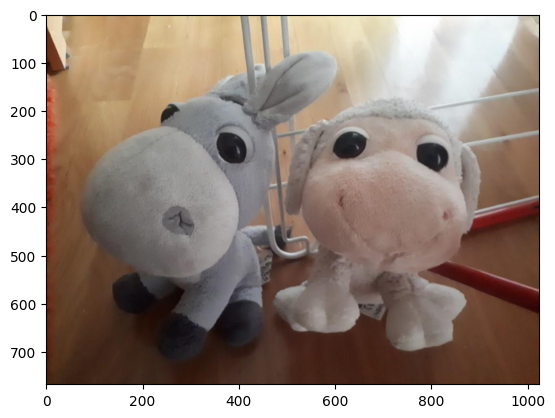

In [10]:
# Show one image from dataset
%matplotlib inline
from matplotlib import pyplot as plt
img = cv2.imread("./datasets/2plysaci/train/images/20181209_093257_jpg.rf.9e5de39c501d75369ffa14627baaa318.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Option 1 - all layers learnable, just take weights from pretrained model

In [11]:
# Load pretrained weights, use yolov8n, yolov8s or yolov8l as examples
model = YOLO('yolov8n.pt')

In [12]:
# Train the model
train = model.train(data='./datasets/2plysaci.yaml', epochs=100, imgsz=1024)

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 14931MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/2plysaci.yaml, epochs=100, patience=50, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optim

In [17]:
# Find folder with latest run of training
import os

files = os.listdir("runs/detect/")
max_number = 0
latest_run = ""
for file in files:
    if "train" in file:
        if file.split("train")[1]:
            number = int(file.split("train")[1])
            max_number = max(max_number, number)
if max_number == 0:
    latest_run = "runs/detect/train"
else:
    latest_run = "runs/detect/train" + str(max_number)
print(latest_run)

runs/detect/train2



image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/datasets/2plysaci/test/20181209_092837.jpg: 768x1024 1 donkey, 1 sheep, 50.3ms
Speed: 2.0ms preprocess, 50.3ms inference, 2.3ms postprocess per image at shape (1, 3, 768, 1024)


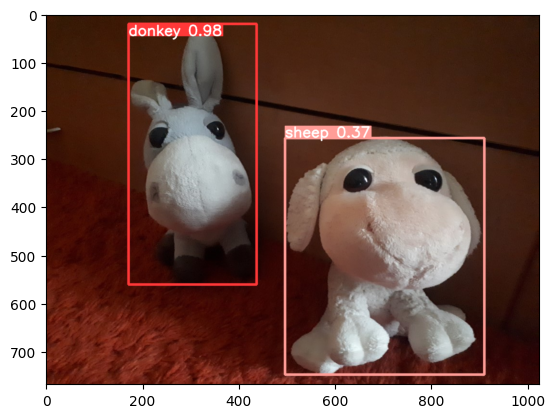

In [18]:
# Test sample 1
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/2plysaci/test/20181209_092837.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))


image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/test2017/000000576058.jpg: 1024x768 (no detections), 11.8ms
Speed: 3.1ms preprocess, 11.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 768)


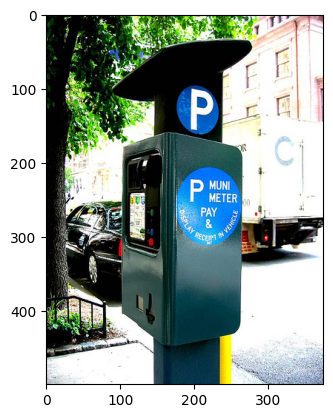

In [21]:
# Generic picture - we expect no objects to be found
results = best_model("./test2017/000000576058.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))

### Option 2 - 10 first layers frozen, rest layers learnable, take weights from pretrained model

In [22]:
# Load pretrained weights, use yolov8n, yolov8s or yolov8l as examples
model = YOLO('yolov8n.pt')

In [23]:
# Freeze layers via callback
def freeze_layer(trainer):
    model = trainer.model
    num_freeze = 10
    print(f"Freezing {num_freeze} layers")
    freeze = [f'model.{x}.' for x in range(num_freeze)]  # layers to freeze 
    for k, v in model.named_parameters(): 
        v.requires_grad = True  # train all layers 
        if any(x in k for x in freeze): 
            print(f'freezing {k}') 
            v.requires_grad = False 
    print(f"{num_freeze} layers are freezed.")

# Uncomment to freeze layers
model.add_callback("on_train_start", freeze_layer)

In [24]:
# Train the model
train = model.train(data='./datasets/2plysaci.yaml', epochs=100, imgsz=1024)

Ultralytics YOLOv8.0.167 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 14931MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/2plysaci.yaml, epochs=100, patience=50, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optim

Freezing 10 layers
freezing model.0.conv.weight
freezing model.0.bn.weight
freezing model.0.bn.bias
freezing model.1.conv.weight
freezing model.1.bn.weight
freezing model.1.bn.bias
freezing model.2.cv1.conv.weight
freezing model.2.cv1.bn.weight
freezing model.2.cv1.bn.bias
freezing model.2.cv2.conv.weight
freezing model.2.cv2.bn.weight
freezing model.2.cv2.bn.bias
freezing model.2.m.0.cv1.conv.weight
freezing model.2.m.0.cv1.bn.weight
freezing model.2.m.0.cv1.bn.bias
freezing model.2.m.0.cv2.conv.weight
freezing model.2.m.0.cv2.bn.weight
freezing model.2.m.0.cv2.bn.bias
freezing model.3.conv.weight
freezing model.3.bn.weight
freezing model.3.bn.bias
freezing model.4.cv1.conv.weight
freezing model.4.cv1.bn.weight
freezing model.4.cv1.bn.bias
freezing model.4.cv2.conv.weight
freezing model.4.cv2.bn.weight
freezing model.4.cv2.bn.bias
freezing model.4.m.0.cv1.conv.weight
freezing model.4.m.0.cv1.bn.weight
freezing model.4.m.0.cv1.bn.bias
freezing model.4.m.0.cv2.conv.weight
freezing model

Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      2.37G     0.8128      3.105      1.379         36       1024: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.65it/s]
                   all          3          6    0.00679          1      0.256      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      2/100      2.31G      1.059      3.175      1.635         36       1024: 100%|██████████| 2/2 [00:00<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]
                   all          3          6     0.0069          1      0.377      0.139

      E

In [25]:
# Find folder with latest run of training
import os

files = os.listdir("runs/detect/")
max_number = 0
latest_run = ""
for file in files:
    if "train" in file:
        if file.split("train")[1]:
            number = int(file.split("train")[1])
            max_number = max(max_number, number)
if max_number == 0:
    latest_run = "runs/detect/train"
else:
    latest_run = "runs/detect/train" + str(max_number)
print(latest_run)

runs/detect/train3



image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/datasets/2plysaci/test/20181209_092837.jpg: 768x1024 1 donkey, 1 sheep, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.5ms postprocess per image at shape (1, 3, 768, 1024)


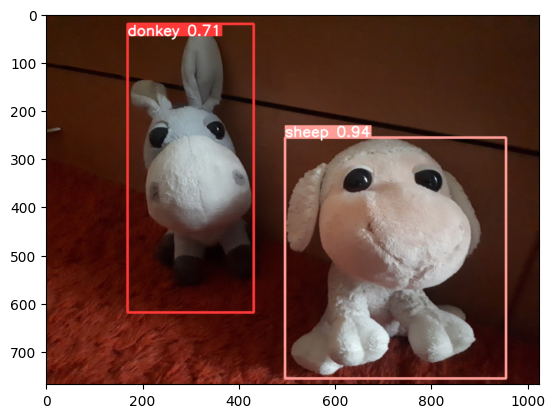

In [26]:
# Test sample 1
best_model = YOLO(f"{latest_run}/weights/best.pt")
results = best_model("./datasets/2plysaci/test/20181209_092837.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))


image 1/1 /home/tomas/keep-long-story-long/long_introductions/computer_vision/yolo/test2017/000000576058.jpg: 1024x768 2 donkeys, 18.3ms
Speed: 3.2ms preprocess, 18.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 768)


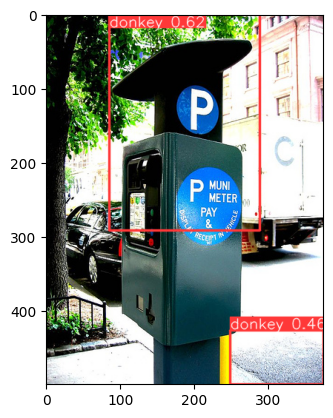

In [28]:
# Generic picture - we expect no objects to be found
results = best_model("./test2017/000000576058.jpg") 
res_plotted = results[0].plot()
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))